# PageRank


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import math

In [78]:
def simpler_pagerank(M):
    N = M.shape[1]
    w = np.ones(N) / N
    v = M @ w
    while(np.linalg.norm(w - v) >= 1e-10):
        w = v
        v = M @ w
    return v

In [95]:
def pagerank(M, d: float = 0.75):
    N = M.shape[1]
    w = np.ones(N) / N
    M_hat = d * M
    v = M_hat @ w + (1 - d) / N
    while(np.linalg.norm(w - v) >= 1e-10):
        w = v
        v = M_hat @ w + (1 - d) / N
    return v 

In [103]:
def remake(G):
    A = nx.to_numpy_array(G).T  
    column_sums = A.sum(axis=0)
    dangling = column_sums == 0
    A[:, dangling] = 1 / A.shape[0]

    column_sums = A.sum(axis=0) 
    A = A / column_sums
    return A

In [114]:
G = nx.karate_club_graph()
N = G.number_of_nodes()
A = remake(G)
#print(A)
ranks = pagerank(A)
print(ranks)

[0.08487996 0.05419092 0.05781942 0.03624366 0.0217914  0.03424207
 0.0320598  0.02577709 0.03171563 0.01156131 0.02201639 0.01190008
 0.01339911 0.03172165 0.0145213  0.01741559 0.01840494 0.01178586
 0.01167192 0.01463449 0.01307416 0.01318735 0.01454376 0.03902248
 0.01794384 0.0282261  0.01683434 0.02711198 0.0157496  0.02854414
 0.02296908 0.040239   0.07218431 0.09261726]


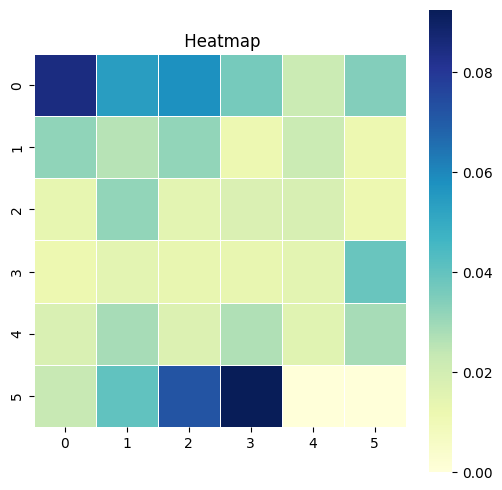

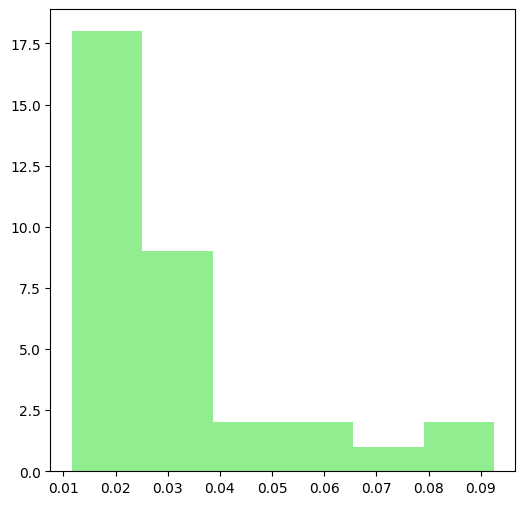

In [117]:
side = math.ceil(math.sqrt(N))
pad = side * side - N
ranks_padded = np.append(ranks, np.zeros(pad))
rank_matrix = ranks_padded.reshape(side, side) # 6x6 do 34

plt.figure(figsize=(6, 6))
sns.heatmap(rank_matrix, cmap="YlGnBu", square=True, linewidths=0.5)
plt.title(" Heatmap")
plt.show()

plt.figure(figsize=(6, 6))
plt.hist(ranks, bins=6, color='lightgreen')
plt.show()

### Inne grafy

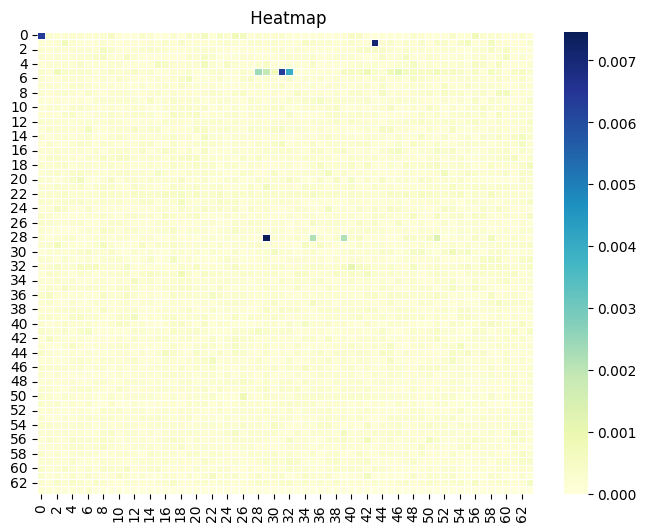

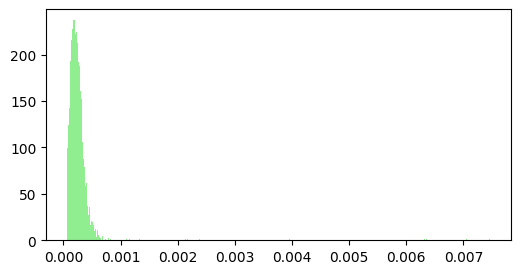

In [121]:
file_path = "facebook_combined/facebook_combined.txt"

with open(file_path, "r") as f: edges = [tuple(map(int, line.strip().split())) for line in f if line.strip()]

G = nx.Graph()
G.add_edges_from(edges)

N = G.number_of_nodes()
A = remake(G)

ranks = pagerank(A)

side = math.ceil(math.sqrt(N))
pad = side * side - N
ranks_padded = np.append(ranks, np.zeros(pad))
rank_matrix = ranks_padded.reshape(side, side)
plt.figure(figsize=(8,6)) 
sns.heatmap(rank_matrix, cmap="YlGnBu", linewidths=0.5)
plt.title(" Heatmap")
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(ranks, bins=500, color='lightgreen')
plt.show()

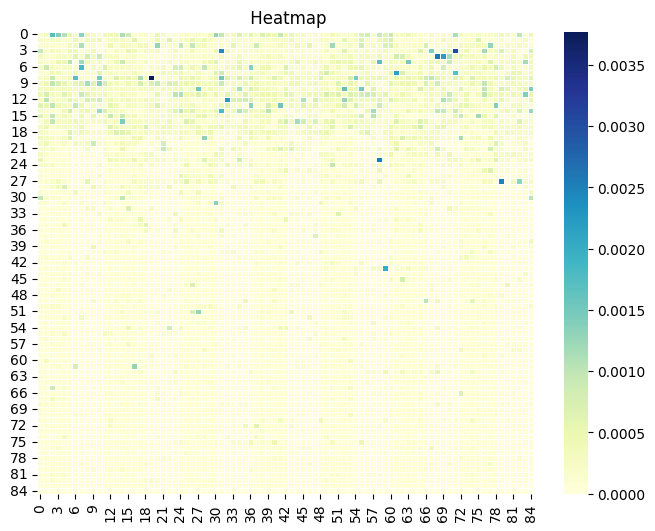

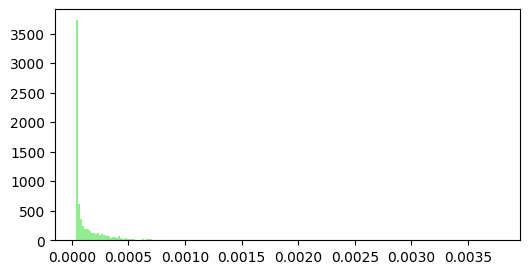

In [123]:
file_path = "Wiki-Vote.txt"

with open(file_path, "r") as f: edges = [tuple(map(int, line.strip().split())) for line in f if line.strip()]

G = nx.Graph()
G.add_edges_from(edges)
N = G.number_of_nodes()
A = remake(G)

ranks = pagerank(A)
side = math.ceil(math.sqrt(N))
pad = side * side - N
ranks_padded = np.append(ranks, np.zeros(pad))
rank_matrix = ranks_padded.reshape(side, side)

plt.figure(figsize=(8,6)) 
sns.heatmap(rank_matrix, cmap="YlGnBu", linewidths=0.5)
plt.title(" Heatmap")
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(ranks, bins=200, color='lightgreen')
plt.show()

Graph with 475 nodes and 10222 edges


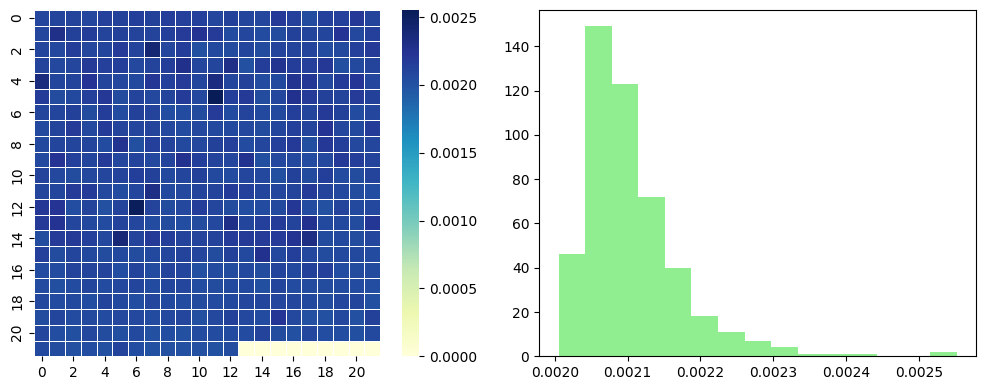

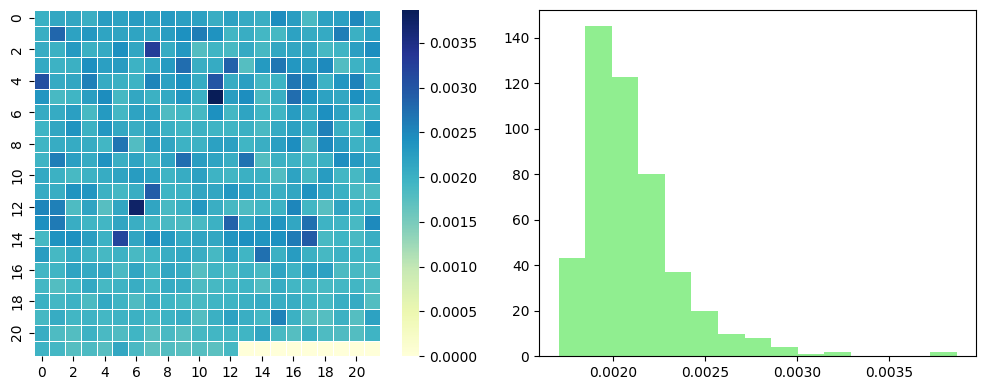

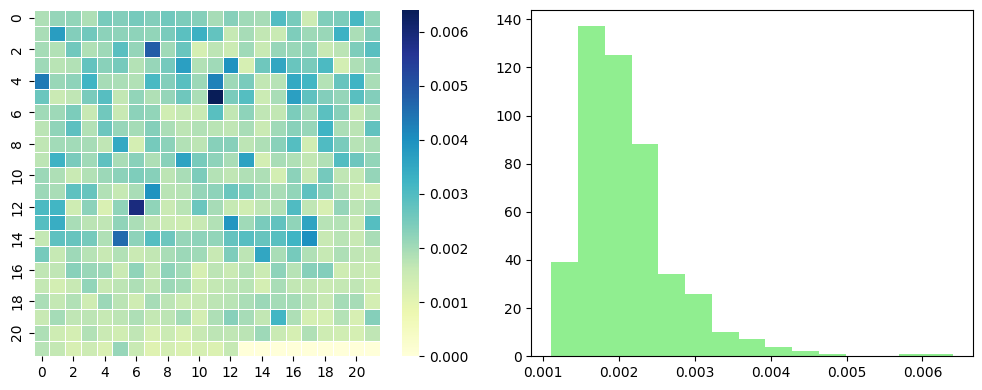

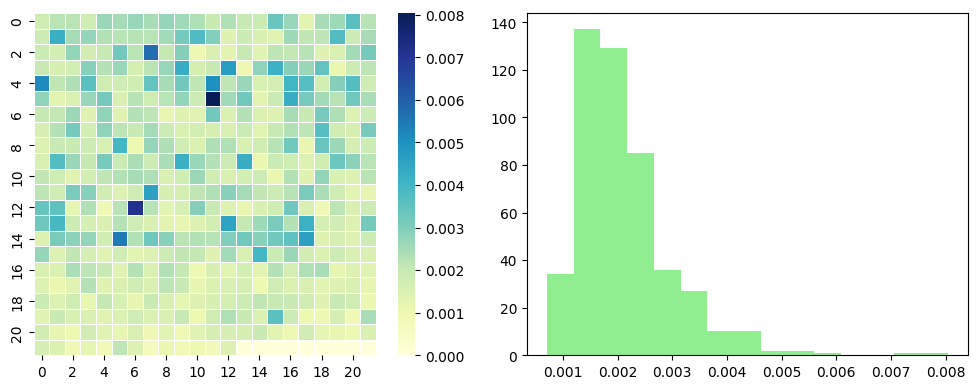

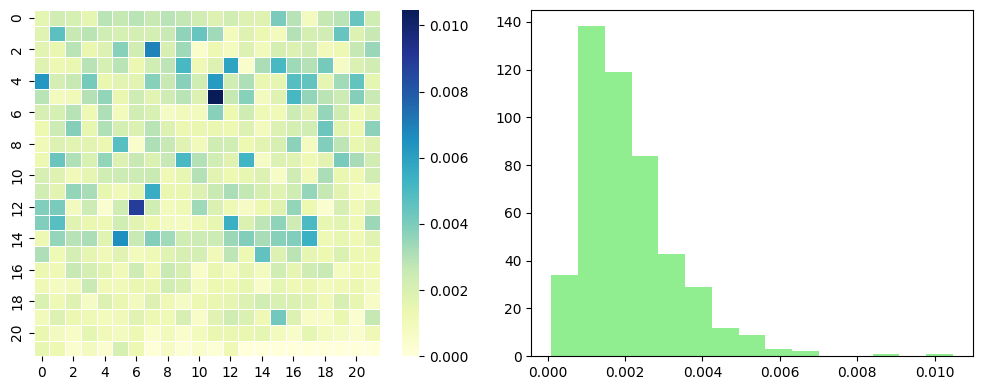

In [ ]:
file_path = "edges.txt"

edges = []
with open(file_path, "r") as f:
    for line in f:
        if line.strip():
            parts = line.strip().split()
            u = int(parts[0])
            v = int(parts[1])
            edges.append((u, v))
G = nx.Graph()
G.add_edges_from(edges)
print(G)

N = G.number_of_nodes()
A = remake(G)


def plot(d):
    ranks = pagerank(A,d)
    side = math.ceil(math.sqrt(N))
    pad = side * side - N
    ranks_padded = np.append(ranks, np.zeros(pad))
    rank_matrix = ranks_padded.reshape(side, side)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 

    sns.heatmap(rank_matrix, cmap="YlGnBu", square=True, linewidths=0.5, cbar=True, ax=axes[0])

    axes[1].hist(ranks, bins=15, color='lightgreen')

    plt.tight_layout()
    plt.show()
# dla roznych wartosci delta
plot(0.05)
plot(0.2)
plot(0.5)
plot(0.7)
plot(1)

### Pagerank z innym wektorem teleportacji

In [125]:
# implementacja z losowym wektorem e
def pagerank2(M, d: float = 0.75):
    N = M.shape[1]
    w = np.ones(N) / N
    e = np.random.rand(N)
    e = e / e.sum()
    M_hat = d * M
    v = M_hat @ w + (1 - d) * e
    while np.linalg.norm(w - v) >= 1e-10:
        w = v
        v = M_hat @ w + (1 - d) * e

    return v

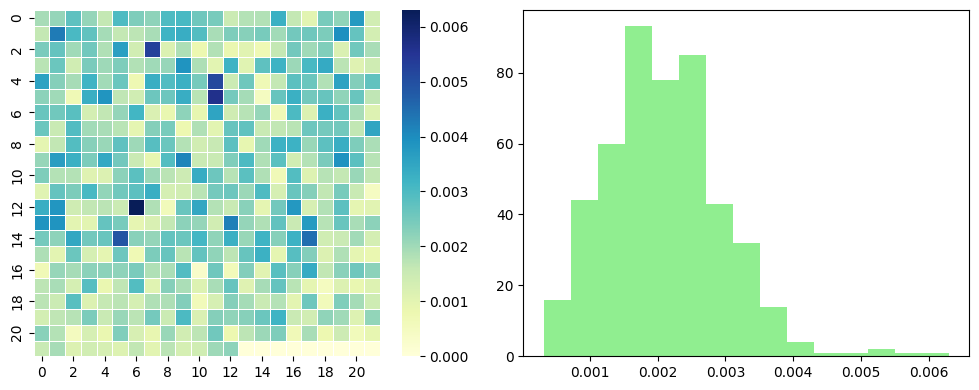

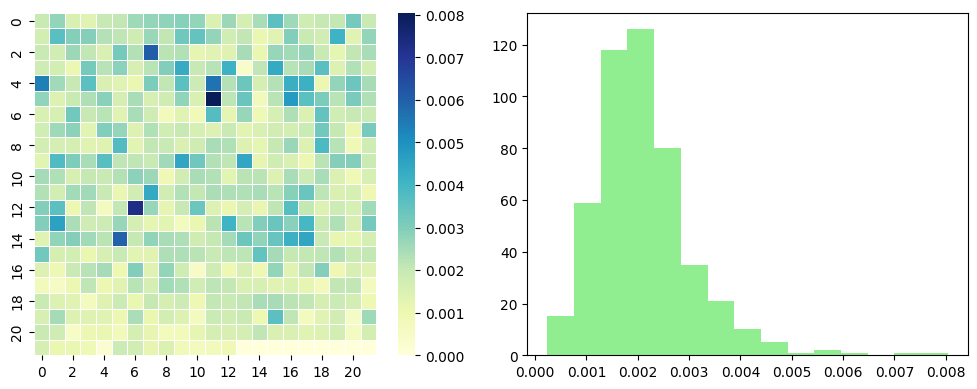

In [126]:
def plot2(d):
    ranks = pagerank2(A,d)
    side = math.ceil(math.sqrt(N))
    pad = side * side - N
    ranks_padded = np.append(ranks, np.zeros(pad))
    rank_matrix = ranks_padded.reshape(side, side)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 

    sns.heatmap(rank_matrix, cmap="YlGnBu", square=True, linewidths=0.5, cbar=True, ax=axes[0])

    axes[1].hist(ranks, bins=15, color='lightgreen')

    plt.tight_layout()
    plt.show()
# dla roznych wartosci delta
plot2(0.5)
plot2(0.7)


In [127]:
# wartości niezerowe tylko dla ineksow o wartosiach liczb pierwszych

def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5)+1):
        if n % i == 0:
            return False
    return True

def pagerank3(M, d: float = 0.75):
    N = M.shape[1]
    w = np.ones(N) / N

    prime_indices = [i for i in range(N) if is_prime(i)]
    e = np.zeros(N)
    random_values = np.random.rand(len(prime_indices))
    random_values /= random_values.sum()  
    for i, idx in enumerate(prime_indices): e[idx] = random_values[i]
    M_hat = d * M
    v = M_hat @ w + (1 - d) * e
    while np.linalg.norm(w - v) >= 1e-10:
        w = v
        v = M_hat @ w + (1 - d) * e

    return v

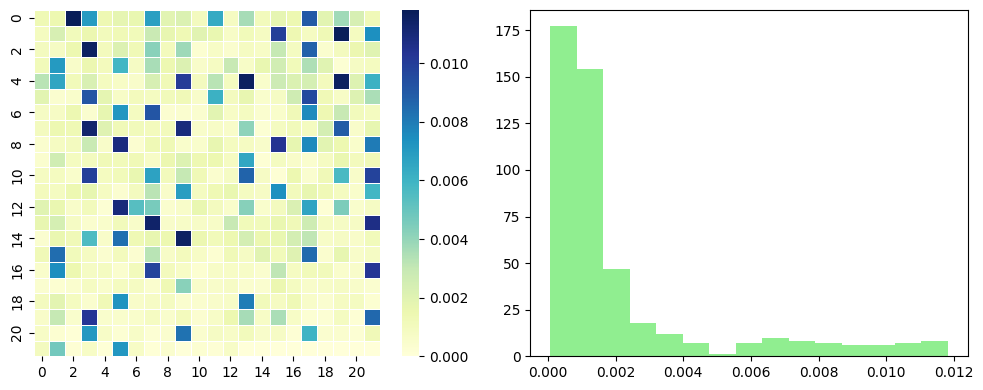

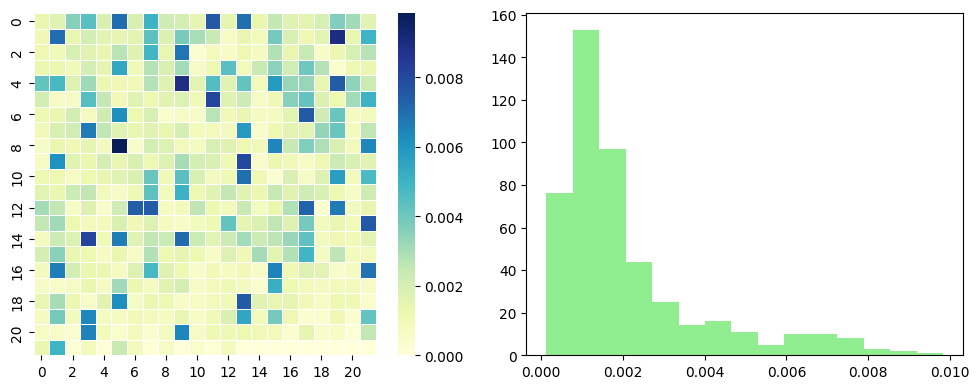

In [128]:
def plot3(d):
    ranks = pagerank3(A,d)
    side = math.ceil(math.sqrt(N))
    pad = side * side - N
    ranks_padded = np.append(ranks, np.zeros(pad))
    rank_matrix = ranks_padded.reshape(side, side)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 

    sns.heatmap(rank_matrix, cmap="YlGnBu", square=True, linewidths=0.5, cbar=True, ax=axes[0])

    axes[1].hist(ranks, bins=15, color='lightgreen')

    plt.tight_layout()
    plt.show()
# dla roznych wartosci delta
plot3(0.5)
plot3(0.7)
